# Install dependencies

In [1]:
# Install dependencies
try:
    from ceda_datapoint import DataPointClient
except ImportError as exc:
    !pip install ceda-datapoint
    from ceda_datapoint import DataPointClient

# Create a client instance - for searching the CEDA STAC catalog

In [2]:
client = DataPointClient(org="CEDA")
client


<DataPointClient: CEDA-217396>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA

# Basic search
Perform a basic search of the CMIP6 climate model simulations dataset, filtering on experiment, activity and institution:

In [3]:
search_basic = client.search(
    collections=['cmip6'],
    query=[
        'cmip6:experiment_id=ssp585',
        'cmip6:activity_id=ScenarioMIP',
        'cmip6:institution_id=KIOST',
    ],
    max_items = 10
)

# Collect up the "cloud assets" connected with the search results
This method collects up the cloud assets, which may be Zarr, NetCDF or Kerchunk files. The latter represent an index that points to content within other files (typically NetCDF).

The files themselves can be served over a variety of protocols, including:

POSIX: local file system
HTTP(S): old-fashioned HTTP(S) access
S3: using Amazon's S3 protocol (over HTTP(S))
We identify them and then list the related products.

In [4]:
cluster = search_basic.collect_cloud_assets()
cluster


<DataPointCluster: CEDA-217396-389849-326369 (Datasets: 10)>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA
 - search_terms: {'query': ['cmip6:experiment_id=ssp585', 'cmip6:activity_id=ScenarioMIP', 'cmip6:institution_id=KIOST'], 'max_items': 10}
 - collections: ['cmip6']
 - products: 10
Products:
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsus.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsds.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rlus.gr1.v20191106-

In [5]:
product = cluster[2]
ds = product.open_dataset()

In [6]:
dir(product)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_mapper',
 '_multiple_options',
 '_open_cfa',
 '_open_cog',
 '_open_kerchunk',
 '_open_zarr',
 '_prepare_dataset',
 '_set_visibility',
 'attributes',
 'bbox',
 'cloud_format',
 'collection',
 'end_datetime',
 'get_attribute',
 'help',
 'href',
 'id',
 'info',
 'meta',
 'open_asset',
 'open_dataset',
 'stac_attributes',
 'start_datetime',
 'units',
 'variables']

# Select a product and use it (as an Xarray Dataset)
A product has an .open_dataset() method, which loads it (lazily) into an xarray.Dataset, making it ready for use in the Python session.

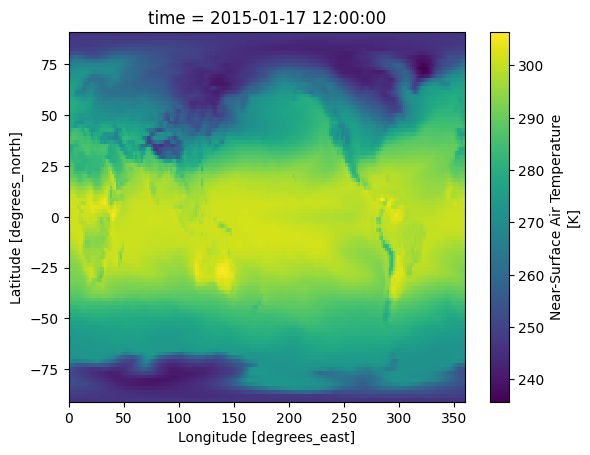

In [7]:
tas_product = None

for product in cluster:
    if "tas" in product.id:
        tas_product = product
        break

if tas_product:
    ds = tas_product.open_dataset()
    ds.tas.sel(time="2015-01-17 12:00:00").squeeze().plot()
else:
    print("tas variable not found in cluster")

In [8]:
for product in cluster:
    if "tas" in product.id:
        print(product.id)
        print(product.stac_attributes.keys())
        print(product.stac_attributes)
        break

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 

In [9]:
for product in cluster:
    print(f"\nProduct ID: {product.id}")
    print("Available stac_attributes keys:", product.stac_attributes.keys())


Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.s

In [10]:
tas_products = [p for p in cluster if "tas" in p.id]

for p in tas_products:
    print(p.id)

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file


In [11]:
# Access metadata for the selected 'tas' product
if tas_product:
    metadata = tas_product.stac_attributes
    print("STAC Metadata for Product ID:", tas_product.id)
    print("STAC Attributes:", metadata)

    # If you'd like to see more details or other attributes:
    for key, value in metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

STAC Metadata for Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
STAC Attributes: {'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.s

In [12]:
if tas_product:
    # Extract STAC metadata fields
    metadata = tas_product.stac_attributes
    item_metadata = {
        "ID": tas_product.id,
        "Type": metadata.get("type"),
        "STAC Version": metadata.get("stac_version"),
        "Collection": metadata.get("collection"),
        "Links": metadata.get("links"),
        "Bounding Box": metadata.get("bbox"),
        "Geometry": metadata.get("geometry")
    }

    # Display metadata
    for key, value in item_metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Type: Feature
STAC Version: 1.1.0
Collection: cmip6
Links: [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}]
Bounding Box: [-179.0625, -90.0, 179.0625, 90.0]
Geometry: {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}


In [13]:
print(dir(tas_product))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_mapper', '_multiple_options', '_open_cfa', '_open_cog', '_open_kerchunk', '_open_zarr', '_prepare_dataset', '_set_visibility', 'attributes', 'bbox', 'cloud_format', 'collection', 'end_datetime', 'get_attribute', 'help', 'href', 'id', 'info', 'meta', 'open_asset', 'open_dataset', 'stac_attributes', 'start_datetime', 'units', 'variables']


#Inspecting Metadata in a STAC Item

In [14]:
# Try checking the 'variables' attribute to see if the data is present there
print(tas_product.variables)

# Or inspect the 'stac_attributes' for any relevant metadata
print(tas_product.stac_attributes)

# You can also explore 'attributes' if the other two don't help
print(tas_product.attributes)

WARNING [ceda_datapoint.mixins.properties]: Attribute not found from options: ['variables', 'variable_long_name']


None
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}], 'collection': 'cmip6'}
{'title': 'CMIP6.ScenarioMIP.KIOST

# CMIP6 STAC to GeoCroissant Converter

In [24]:
from ceda_datapoint import DataPointClient
from mlcroissant import Dataset
from urllib.parse import urlparse
import requests
import json


def get_asset_type(asset_href):
    """Determine asset type from href/file extension"""
    path = urlparse(asset_href).path.lower()
    if path.endswith('.json'):
        return 'application/json'
    elif path.endswith(('.nc', '.netcdf', '.cdf')):
        return 'application/netcdf'
    elif path.endswith('.zarr'):
        return 'application/zarr'
    elif path.endswith(('.tif', '.tiff', '.geotiff')):
        return 'image/tiff'
    else:
        return 'application/octet-stream'


def stac_to_geocroissant(stac_item):
    """Convert full STAC item (dict) to GeoCroissant metadata"""
    properties = stac_item.get('properties', {})
    assets = stac_item.get('assets', {})
    bbox = stac_item.get('bbox', [])
    geometry = stac_item.get('geometry', {})
    item_id = stac_item.get('id', 'unknown')

    print(f"[INFO] Found assets: {list(assets.keys())}")
    for k, v in assets.items():
        print(f"  - {k}: href={v.get('href')}")

    variable_name = properties.get('cmip6:variable_long_name', 'Unknown')
    variable_id = properties.get('cmip6:variable_id', 'tas')
    variable_units = properties.get('cmip6:variable_units', 'K')

    croissant_metadata = {
        "@context": {
            "@vocab": "https://schema.org/",
            "geocr": "https://mlcommons.org/croissant/geocroissant/1.0",
            "cr": "https://mlcommons.org/croissant/1.0",
            "cmip6": "https://w3id.org/cmip6/",
            "fileObject": "cr:FileObject",
            "fileSet": "cr:FileSet",
            "recordSet": "cr:RecordSet",
            "field": "cr:Field",
            "data": {"@id": "cr:data", "@type": "@json"},
            "source": "cr:source",
            "references": "cr:references",
            "transform": "cr:transform",
            "format": "cr:format"
        },
        "@type": "Dataset",
        "name": properties.get('title', item_id),
        "description": f"CMIP6 dataset for temperature: {variable_name}",
        "license": "https://creativecommons.org/licenses/by/4.0/",
        "distribution": {
            "@type": "FileSet",
            "name": "cmip6_data_files",
            "description": f"Collection of data files for {variable_name} dataset",
            "containedIn": [
                {
                    "@type": "FileObject",
                    "name": asset_key,
                    "description": f"{asset_key} asset for {item_id}",
                    "contentUrl": asset.get('href', 'N/A'),
                    "encodingFormat": get_asset_type(asset.get('href', '')),
                    "cmip6:variable_id": variable_id,
                    "cmip6:variable_long_name": variable_name,
                    "cmip6:variable_units": variable_units
                }
                for asset_key, asset in assets.items()
            ]
        },
        "recordSet": [
            {
                "@type": "RecordSet",
                "name": "geospatial_metadata",
                "description": "Geospatial metadata extracted from STAC",
                "field": [
                    {
                        "@type": "Field",
                        "name": "bounding_box",
                        "description": "Dataset bounding box",
                        "data": bbox
                    },
                    {
                        "@type": "Field",
                        "name": "geometry",
                        "description": "Dataset geometry",
                        "data": geometry
                    },
                    {
                        "@type": "Field",
                        "name": "temporal_coverage",
                        "description": "Temporal coverage",
                        "data": f"{properties.get('start_datetime', '')}/{properties.get('end_datetime', '')}"
                    }
                ]
            },
            {
                "@type": "RecordSet",
                "name": "cmip6_metadata",
                "description": "CMIP6-specific metadata",
                "field": [
                    {
                        "@type": "Field",
                        "name": "activity_id",
                        "description": "CMIP6 activity ID",
                        "data": properties.get('cmip6:activity_id', '')
                    },
                    {
                        "@type": "Field",
                        "name": "experiment_id",
                        "description": "CMIP6 experiment ID",
                        "data": properties.get('cmip6:experiment_id', '')
                    }
                ]
            }
        ]
    }
    return croissant_metadata


def main():
    try:
        client = DataPointClient(org="CEDA")

        search = client.search(
            collections=['cmip6'],
            query=[
                'cmip6:experiment_id=ssp585',
                'cmip6:activity_id=ScenarioMIP',
                'cmip6:institution_id=KIOST',
                'cmip6:variable_id=tas',
            ],
            max_items=1
        )
        _, datapoint_item = next(iter(search.items.items()))

        # Extract 'self' STAC URL
        stac_url = None
        for link in datapoint_item.stac_attributes.get("links", []):
            if link.get("rel") == "self":
                stac_url = link["href"]
                break

        if not stac_url:
            raise RuntimeError("Could not find 'self' link in STAC metadata.")

        print(f"[INFO] Fetching full STAC item from: {stac_url}")
        response = requests.get(stac_url)
        response.raise_for_status()
        stac_item_full = response.json()

        geocroissant_data = stac_to_geocroissant(stac_item_full)

        output_path = 'ceda_cmip6_geocroissant.json'
        with open(output_path, 'w') as f:
            json.dump(geocroissant_data, f, indent=2)

        dataset = Dataset(output_path)
        print("\n✅ Successfully generated and validated GeoCroissant metadata!")
        print(json.dumps(geocroissant_data, indent=2))

    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        if 'geocroissant_data' in locals():
            print("Generated metadata (may be invalid):")
            print(json.dumps(geocroissant_data, indent=2))


if __name__ == "__main__":
    main()

[INFO] Fetching full STAC item from: https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106


[INFO] Found assets: ['reference_file', 'data0001']
  - reference_file: href=https://dap.ceda.ac.uk/badc/cmip6/metadata/kerchunk/pipeline1/ScenarioMIP/KIOST/KIOST-ESM/kr1.0/CMIP6_ScenarioMIP_KIOST_KIOST-ESM_ssp585_r1i1p1f1_Amon_tas_gr1_v20191106_kr1.0.json
  - data0001: href=https://dap.ceda.ac.uk/badc/cmip6/data/CMIP6/ScenarioMIP/KIOST/KIOST-ESM/ssp585/r1i1p1f1/Amon/tas/gr1/v20191106/tas_Amon_KIOST-ESM_ssp585_r1i1p1f1_gr1_201501-210012.nc

❌ Error: Found the following 4 error(s) during the validation:
  -  [Metadata(CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106) > FileSet(cmip6_data_files)] Property "http://mlcommons.org/schema/includes" is mandatory, but does not exist.
  -  [Metadata(CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106) > FileSet(cmip6_data_files)] Property "https://schema.org/encodingFormat" is mandatory, but does not exist.
  -  [Metadata(CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106) > File

# Visualization with GeoCrossiant

NetCDF file URL: https://dap.ceda.ac.uk/badc/cmip6/data/CMIP6/ScenarioMIP/KIOST/KIOST-ESM/ssp585/r1i1p1f1/Amon/tas/gr1/v20191106/tas_Amon_KIOST-ESM_ssp585_r1i1p1f1_gr1_201501-210012.nc
<xarray.Dataset> Size: 76MB
Dimensions:    (lat: 96, bnds: 2, lon: 192, time: 1032)
Coordinates:
  * time       (time) object 8kB 2015-01-17 12:00:00 ... 2100-12-17 12:00:00
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.563 ... 355.3 357.2 359.1
  * lat        (lat) float64 768B -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Dimensions without coordinates: bnds
Data variables:
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    time_bnds  (time, bnds) object 17kB ...
    tas        (time, lat, lon) float32 76MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60266.0
    branch_time_in_parent:  60266.0
    contact:                YoungHo Kim (

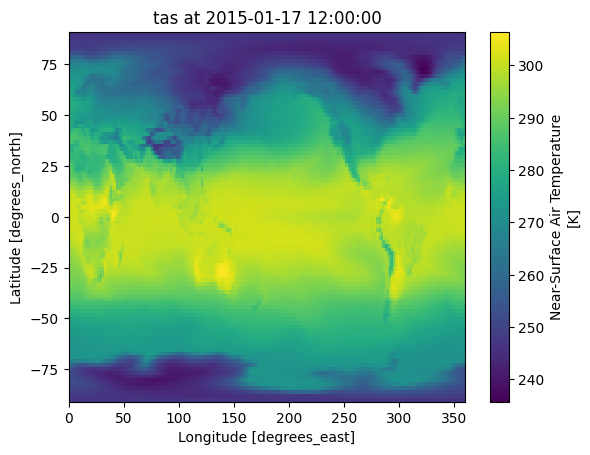

In [36]:
import json
import xarray as xr
import matplotlib.pyplot as plt
import fsspec

GEO_CROISSANT_JSON = "ceda_cmip6_geocroissant.json"

def find_netcdf_url(metadata: dict) -> str:
    for obj in metadata.get("@graph", []):
        if obj.get("encodingFormat") == "application/netcdf":
            return obj["contentUrl"]
    raise ValueError("Could not find NetCDF file in metadata.")

def main():
    # Load metadata
    with open(GEO_CROISSANT_JSON, "r") as f:
        metadata = json.load(f)

    # Get NetCDF URL
    nc_url = find_netcdf_url(metadata)
    print(f"NetCDF file URL: {nc_url}")

    # Open using HTTPFileSystem
    fs = fsspec.filesystem("https")
    with fs.open(nc_url) as f:
        ds = xr.open_dataset(f)
        print(ds)

        variable = "tas"
        time_value = str(ds["time"].values[0])
        print(f"Plotting '{variable}' at {time_value}")

        tas = ds[variable].sel(time=time_value).squeeze()
        tas.plot()
        plt.title(f"{variable} at {time_value}")
        plt.show()

if __name__ == "__main__":
    main()